IMPORT **LIBRARY**



In [1]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import numpy as np



PRE-PROCESSING DATA

In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n+", " ", text)  # Menghapus newline
    text = re.sub(r"[^A-Za-z0-9^,]", " ", text)  # Menghapus karakter selain huruf dan angka
    text = re.sub(r",", " ", text)  # Mengganti tanda koma dengan spasi
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'@\w+', '', text)  # Menghapus mention
    text = re.sub(r"\.", " ", text)  # Mengganti titik dengan spasi
    text = re.sub(r"\!", " ", text)  # Mengganti tanda seru dengan spasi
    text = re.sub(r"\/", " ", text)  # Mengganti tanda garis miring dengan spasi
    text = re.sub(r"\^", " ", text)  # Mengganti tanda petik dengan spasi
    text = re.sub(r"\+", " ", text)  # Mengganti tanda tambah dengan spasi
    text = re.sub(r"\-", " ", text)  # Mengganti tanda minus dengan spasi
    text = re.sub(r"\=", " ", text)  # Mengganti tanda sama dengan spasi
    text = re.sub(r"'", " ", text)  # Menghapus tanda petik tunggal
    text = re.sub(r":", " ", text)  # Mengganti titik dua dengan spasi
    text = re.sub(r'\bhttps?://\S+\b', '', text)  # Menghapus URL
    text = re.sub(r'\bhttps\b', '', text)  # Menghapus 'https'
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)  # Mengganti 'k' dengan '000' untuk angka
    text = ' '.join(text.split())  # Menghapus spasi berlebihan
    return text

# result = clean_text('ratna budi dan dia #goks https://t.co/vuafccpqu3')
# print(result)


In [4]:
def stem_text(text):
    # Inisialisasi stemmer Bahasa Indonesia
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi kata-kata
    words = text.split()

    # Melakukan stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang sudah distem menjadi teks yang bersih
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


In [5]:
def tokenizing(text):
  # Membuat token array
  tokens_word = text.split(" ")
  print(tokens_word)

# tokenizing('idextratime anies tega nanyain soal lindung perempuan ke prabowo lha wong prabowo aja ga lindung istri malah pegat noohhh titiek') 

['idextratime', 'anies', 'tega', 'nanyain', 'soal', 'lindung', 'perempuan', 'ke', 'prabowo', 'lha', 'wong', 'prabowo', 'aja', 'ga', 'lindung', 'istri', 'malah', 'pegat', 'noohhh', 'titiek']


LAKUKAN PRE-PROCESSING

In [11]:
df = pd.read_csv('twitter-data.csv')  # Ganti 'nama_file.csv' dengan nama file CSV Anda
print("dataset")
# print(df)
print("")
print('==========================================================================================================')
print("")
clean = df['full_text'].apply(clean_text).values
df['cleaned-texts'] = clean
# print(df)
print("")
print('==========================================================================================================')
print("")
stemmed_texts = [stem_text(full_text) for full_text in clean]
df['stemmed-texts'] = stemmed_texts
# print(df)
print("")
print('==========================================================================================================')
print("")
tokenize_texts = [tokenizing(full_text) for full_text in stemmed_texts]
df['tokenized-texts'] = tokenize_texts
# print(df)
print("")
print('==========================================================================================================')

print('=========================================HASIL============================================================')
df['pre-process'] = stemmed_texts
df.to_csv('sentimen-pub-pre-process.csv', index=False)
print(df)

dataset






['idextratime', 'anies', 'tega', 'nanyain', 'soal', 'lindung', 'perempuan', 'ke', 'prabowo', 'lha', 'wong', 'prabowo', 'aja', 'ga', 'lindung', 'istri', 'malah', 'pegat', 'noohhh', 'titiek']
['pertanyan', 'pak', 'anies', 'soal', 'lindung', 'kepada', 'perempuan', 'di', 'jawab', 'sendiri', 'oleh', 'pak', 'anies']
['rugi', 'sih', 'klo', 'pak', 'anies', 'ga', 'naik']
['wkwk', 'pa', 'anies', 'sblm', 'nanya', 'ke', 'pa', 'prabowo', 'senyam', 'senyum', 'rem', 'bgt']
['anjirrr', 'finally', 'pak', 'anies', 'ngomongnya', 'lewat', 'waktu', 'walau', 'cma', 'terima', 'kasih', 'doang', 'wkakakakkakaka', 't', 'co', 'vuafccpqu3']
['yaallah', 'anies', 'ngomong', 'akan', 'tindak', 'keras', 'perempuan', 'masuk', 'sejak', 'catcalling', 'gue', 'ken', 'nang', 'detik']
['pak', 'anies', 'tadi', 'udah', 'ngejelasin', 'da', 'naha', 'ai', 'pak', 'prabowo', 'jawab', 'tidak', 'nyambung']
['tadi', 'pak', 'anies', 'kurang', 'tegas']
['pak', 'anies', 'jangan', 'tanya', 'soal', 'perempuan', 'ke', 'pak', '

ANALISIS SENTIMEN MENGGUNAKAN LEXICON-BASED DENGAN INSET LEXICON ID

In [3]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-before.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-before.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-before.csv', index=False)

3609
6609
Kata: tega, Bobot: -5
-5
Kata: soal, Bobot: -1
-6
Kata: lindung, Bobot: 4
-2
Kata: aja, Bobot: 1
-1
Kata: lindung, Bobot: 4
3
Kata: soal, Bobot: -1
-1
Kata: lindung, Bobot: 4
3
Kata: jawab, Bobot: -5
-2
Kata: sendiri, Bobot: -3
-5
Kata: rugi, Bobot: -5
-5
Kata: naik, Bobot: 1
-4
Kata: pa, Bobot: -5
-5
Kata: nanya, Bobot: -1
-6
Kata: pa, Bobot: -5
-11
Kata: senyum, Bobot: -1
-12
Kata: rem, Bobot: -5
-17
Kata: lewat, Bobot: -5
-5
Kata: walau, Bobot: -3
-8
Kata: terima, Bobot: 2
-6
Kata: kasih, Bobot: -1
-7
Kata: doang, Bobot: -1
-8
Kata: masuk, Bobot: -3
-3
Kata: ken, Bobot: -2
-5
Kata: nang, Bobot: -5
-10
Kata: jawab, Bobot: -5
-5
Kata: tidak, Bobot: -5
-10
Kata: kurang, Bobot: -3
-3
Kata: jangan, Bobot: -3
-3
Kata: tanya, Bobot: -2
-5
Kata: soal, Bobot: -1
-6
Kata: dia, Bobot: -3
-9
Kata: aja, Bobot: 1
-8
Kata: punya, Bobot: 3
-5
Kata: jadi, Bobot: -2
-2
Kata: percaya, Bobot: 2
0
Kata: ganjar, Bobot: -3
-3
Kata: dah, Bobot: -3
-6
Kata: bukan, Bobot: -3
-3
Kata: yang, Bobot: -

In [4]:
df = pd.read_csv('analyzed_data-before.csv')

# Menghitung frekuensi masing-masing label
label_counts = df['sentiment'].value_counts()

# Menghitung total jumlah data
total_data = len(df)
print(total_data)

# Menghitung persentase positif, negatif, dan netral
percentage_positive_before = (label_counts.get('Positif', 0) / total_data) * 100
percentage_negative_before = (label_counts.get('Negatif', 0) / total_data) * 100
percentage_neutral_before = (label_counts.get('Netral', 0) / total_data) * 100

# Menampilkan hasil
print(f"Persentase Positive: {percentage_positive_before:.2f}%")
print(f"Persentase Negative: {percentage_negative_before:.2f}%")
print(f"Persentase Neutral: {percentage_neutral_before:.2f}%")


1030
Persentase Positive: 13.11%
Persentase Negative: 82.91%
Persentase Neutral: 3.98%


In [2]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-after.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-after.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

data['interpret'] = data['sentiment'].apply(buzzer_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data_add.csv', index=False)

3819
6782
Kata: anies, Bobot: 3.0
3.0
Kata: tega, Bobot: -5.0
-2.0
Kata: soal, Bobot: -1.0
-3.0
Kata: lindung, Bobot: 3.0
0.0
Kata: perempuan, Bobot: 3.0
3.0
Kata: prabowo, Bobot: 3.0
6.0
Kata: lha, Bobot: -3.0
3.0
Kata: prabowo, Bobot: 3.0
6.0
Kata: aja, Bobot: -2.0
4.0
Kata: ga, Bobot: -4.0
0.0
Kata: lindung, Bobot: 3.0
3.0
Kata: malah, Bobot: -3.0
0.0
Kata: pegat, Bobot: -4.0
-4.0
Kata: noohhh, Bobot: -2.0
-6.0
Kata: pak, Bobot: 1.0
1.0
Kata: anies, Bobot: 3.0
4.0
Kata: soal, Bobot: -1.0
3.0
Kata: lindung, Bobot: 3.0
6.0
Kata: perempuan, Bobot: 3.0
9.0
Kata: jawab, Bobot: -3.0
6.0
Kata: sendiri, Bobot: -3.0
3.0
Kata: oleh, Bobot: -1.0
2.0
Kata: pak, Bobot: 1.0
3.0
Kata: anies, Bobot: 3.0
6.0
Kata: rugi, Bobot: -4.0
-4.0
Kata: sih, Bobot: -2.0
-6.0
Kata: pak, Bobot: 1.0
-5.0
Kata: anies, Bobot: 3.0
-2.0
Kata: ga, Bobot: -4.0
-6.0
Kata: naik, Bobot: 1.0
-5.0
Kata: wkwk, Bobot: -4.0
-4.0
Kata: pa, Bobot: 1.0
-3.0
Kata: anies, Bobot: 3.0
0.0
Kata: nanya, Bobot: -2.0
-2.0
Kata: pa, Bobot

In [5]:
df = pd.read_csv('analyzed_data.csv')

# Menghitung frekuensi masing-masing label
label_counts = df['sentiment'].value_counts()

# Menghitung total jumlah data
total_data = len(df)
print(total_data)

# Menghitung persentase positif, negatif, dan netral
percentage_positive = (label_counts.get('Positif', 0) / total_data) * 100
percentage_negative = (label_counts.get('Negatif', 0) / total_data) * 100
percentage_neutral = (label_counts.get('Netral', 0) / total_data) * 100

# Menampilkan hasil
print(f"Persentase Positive: {percentage_positive:.2f}%")
print(f"Persentase Negative: {percentage_negative:.2f}%")
print(f"Persentase Neutral: {percentage_neutral:.2f}%")


1030
Persentase Positive: 63.98%
Persentase Negative: 32.23%
Persentase Neutral: 3.79%


VISUALISASI HASIL

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13088\1017931775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')


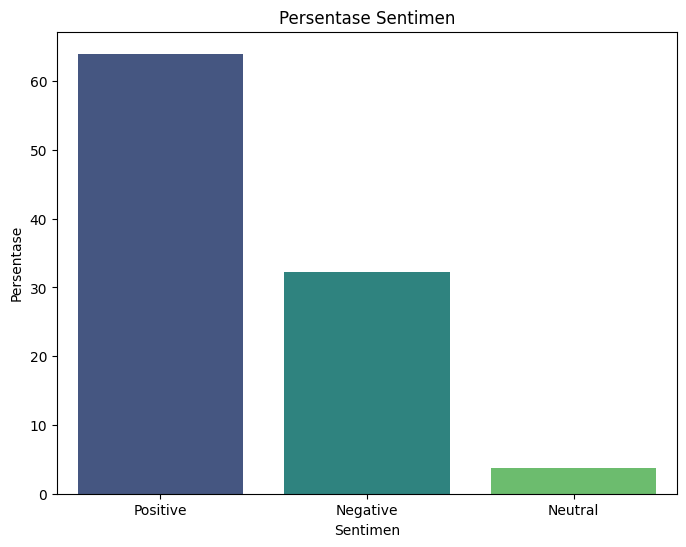

In [6]:
# Data untuk visualisasi
sentiment_labels = ['Positive', 'Negative', 'Neutral']
percentages = [percentage_positive, percentage_negative, percentage_neutral]

# Membuat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')
plt.title('Persentase Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.show()

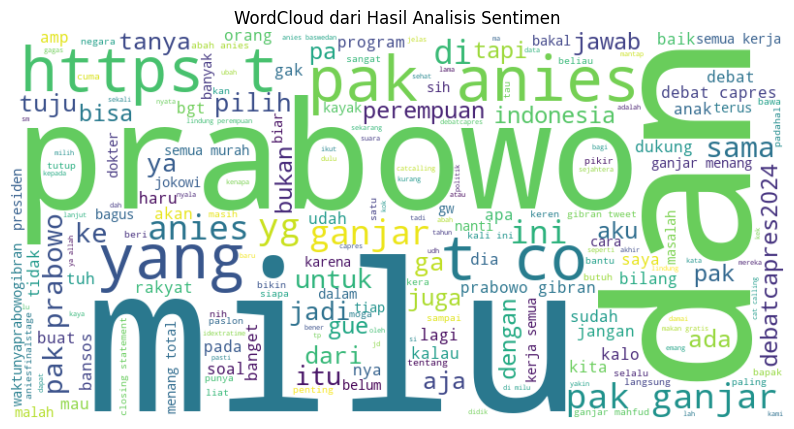

In [7]:
# Menggabungkan semua teks hasil analisis sentimen menjadi satu string
all_text = ' '.join(df['pre-process'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Hasil Analisis Sentimen')
plt.show()


MENGHITUNG JUMLAH KELAS AA (Positif-Positif) HINGGA CC (Netral-Netral) untuk menghitung Confusion Matrix 3 dimensi

In [8]:
# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-before.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA_before = 0
AB_before = 0
AC_before = 0
BA_before = 0
BB_before = 0
BC_before = 0
CA_before = 0
CB_before = 0
CC_before = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA_before += 1
        elif sentiment2 == 'Negatif':
            AB_before += 1
        elif sentiment2 == 'Netral':
            AC_before += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA_before += 1
        elif sentiment2 == 'Negatif':
            BB_before += 1
        elif sentiment2 == 'Netral':
            BC_before += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA_before += 1
        elif sentiment2 == 'Negatif':
            CB_before += 1
        elif sentiment2 == 'Netral':
            CC_before += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA_before)
print("Kelas AB:", AB_before)
print("Kelas AC:", AC_before)
print("Kelas BA:", BA_before)
print("Kelas BB:", BB_before)
print("Kelas BC:", BC_before)
print("Kelas CA:", CA_before)
print("Kelas CB:", CB_before)
print("Kelas CC:", CC_before)


Kelas AA: 103
Kelas AB: 473
Kelas AC: 32
Kelas BA: 23
Kelas BB: 327
Kelas BC: 6
Kelas CA: 9
Kelas CB: 54
Kelas CC: 3


In [9]:
TP = AA_before+BB_before+CC_before
total = len(data1)
Accuracy_before = TP/total

PA = AA_before/(AA_before+(AB_before+AC_before))
PB = BB_before/(BB_before+(BA_before+BC_before))
PC = CC_before/(CC_before+(CA_before+CB_before))
Precision_before = (PA + PB + PC)/3

RA = AA_before/(AA_before+(BA_before+CA_before))
RB = BB_before/(BB_before+(AB_before+CB_before))
RC = CC_before/(CC_before+(AC_before+BC_before))
Recall_before = (RA + RB + RC)/3

# Menghitung F1-Score
F1score_before = (2*Recall_before*Precision_before)/(Recall_before+Precision_before)

print('Accuracy sebelum : ', Accuracy_before, '== ', Accuracy_before*100, '%')
print('Precision sebelum : ', Precision_before, '== ', Precision_before*100, '%')
print('Recall sebelum : ', Recall_before, '== ', Recall_before*100, '%')
print('F1-Score sebelum : ', F1score_before, '== ', F1score_before*100, '%')

Accuracy sebelum :  0.4203883495145631 ==  42.03883495145631 %
Precision sebelum :  0.377800588678028 ==  37.7800588678028 %
Recall sebelum :  0.4063458919783057 ==  40.634589197830564 %
F1-Score sebelum :  0.3915536726449562 ==  39.155367264495624 %


In [10]:
# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)

Kelas AA: 585
Kelas AB: 14
Kelas AC: 9
Kelas BA: 40
Kelas BB: 306
Kelas BC: 10
Kelas CA: 34
Kelas CB: 12
Kelas CC: 20


**Confusion Matrix**
menghitung tingkat akurasi dari penelitian

In [14]:
# Confussion matrix 3 dimensi
# Sesuai jurnal
# CM = (AA+BB+CC)/(total)
# print(AA+BB+CC)
# print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
total = len(data1)
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
PA = AA/(AA+(AB+AC))
print(PA)
PB = BB/(BB+(BA+BC))
print(PB)
PC = CC/(CC+(CA+CB))
print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
RA = AA/(AA+(BA+CA))
print(RA)
RB = BB/(BB+(AB+CB))
print(RB)
RC = CC/(CC+(AC+BC))
print(RC)
Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

0.962171052631579
0.8595505617977528
0.30303030303030304
0.8877086494688923
0.9216867469879518
0.5128205128205128
Accuracy :  0.8844660194174757 ==  88.44660194174757 %
Precision :  0.7082506391532116 ==  70.82506391532117 %
Recall :  0.774071969759119 ==  77.4071969759119 %
F1-Score :  0.7396999331134212 ==  73.96999331134212 %


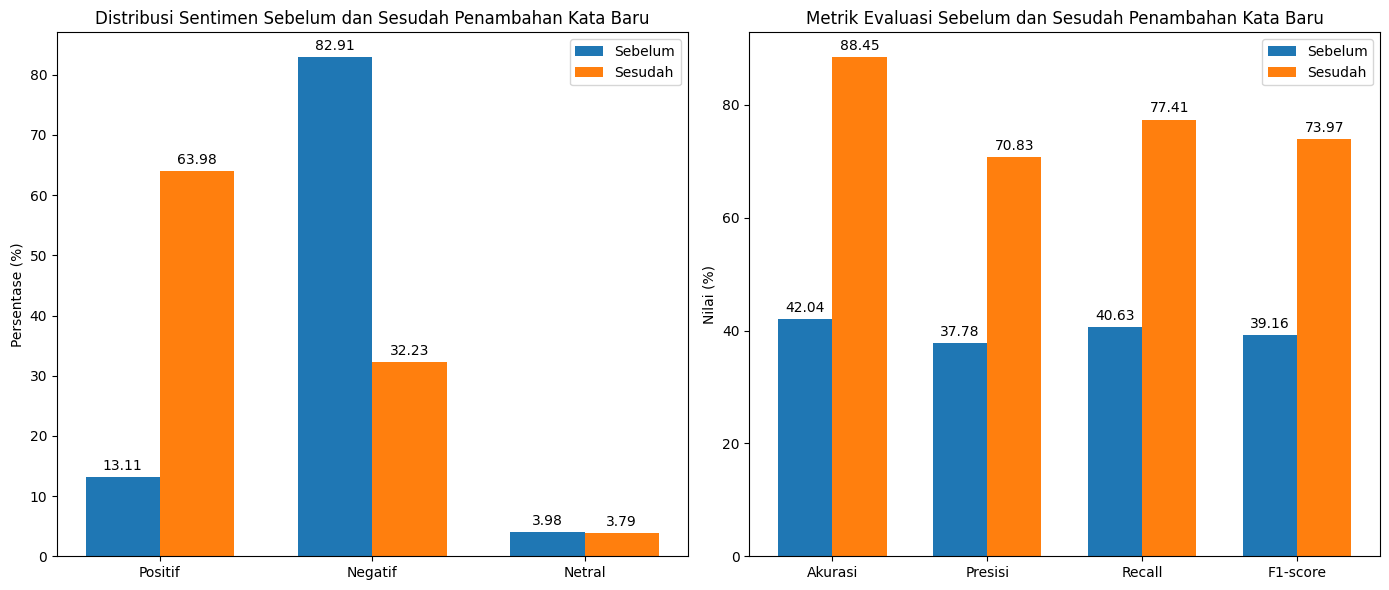

In [13]:
# Data sentimen sebelum dan sesudah penambahan kata baru
sentimen_sebelum = [percentage_positive_before, percentage_negative_before, percentage_neutral_before]
sentimen_sesudah = [percentage_positive, percentage_negative, percentage_neutral]
labels_sentimen = ['Positif', 'Negatif', 'Netral']

# Data metrik evaluasi sebelum dan sesudah penambahan kata baru
metrik_sebelum = [Accuracy_before*100, Precision_before*100, Recall_before*100, F1score_before*100]
metrik_sesudah = [Accuracy*100, Precision*100, Recall*100, F1score*100]
labels_metrik = ['Akurasi', 'Presisi', 'Recall', 'F1-score']

# Mengatur lokasi label sumbu x
x_sentimen = np.arange(len(labels_sentimen))
x_metrik = np.arange(len(labels_metrik))

width = 0.35  # Lebar bar

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot untuk distribusi sentimen
rects1 = ax[0].bar(x_sentimen - width/2, sentimen_sebelum, width, label='Sebelum')
rects2 = ax[0].bar(x_sentimen + width/2, sentimen_sesudah, width, label='Sesudah')

# Menambahkan label, judul, dan kustomisasi sumbu x
ax[0].set_ylabel('Persentase (%)')
ax[0].set_title('Distribusi Sentimen Sebelum dan Sesudah Penambahan Kata Baru')
ax[0].set_xticks(x_sentimen)
ax[0].set_xticklabels(labels_sentimen)
ax[0].legend()

# Plot untuk metrik evaluasi
rects3 = ax[1].bar(x_metrik - width/2, metrik_sebelum, width, label='Sebelum')
rects4 = ax[1].bar(x_metrik + width/2, metrik_sesudah, width, label='Sesudah')

# Menambahkan label, judul, dan kustomisasi sumbu x
ax[1].set_ylabel('Nilai (%)')
ax[1].set_title('Metrik Evaluasi Sebelum dan Sesudah Penambahan Kata Baru')
ax[1].set_xticks(x_metrik)
ax[1].set_xticklabels(labels_metrik)
ax[1].legend()

# Fungsi untuk menambahkan label di atas bar
def autolabel(rects, ax):
    """Menambahkan label teks di atas setiap bar dalam *rects*, menampilkan tinggi bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset vertikal 3 poin
                    textcoords="offset points",
                    ha='center', va='bottom')

# Menerapkan fungsi ke kedua set bar
autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])
autolabel(rects4, ax[1])

fig.tight_layout()

plt.show()
